

*   Rayhan Fadhlurrahman - 24523223
*   Naufal Ahmad Fauzi - 24523168



1. Informasi Dataset

*  Nama: Pima Indians Diabetes Dataset
*  Target: Diabetes (1) vs Non-diabetes (0)
*  Fitur: Variabel klinis (contoh: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
*  Sumber: unduh CSV dari Kaggle / upload ke Colab. (Di Colab: unggah diabetes.csv ke workspace atau mount Google Drive)

2. Persiapan (Colab)

*  Upload diabetes.csv ke Colab (Files) atau simpan di Google Drive dan mount.

*  Jalankan kode di bawah — sudah lengkap untuk preprocessing, modeling, evaluasi, dan visualisasi.

3. Import Library

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
RANDOM_STATE = 42

4. Muat Data

In [30]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()


--2025-12-03 11:25:54--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.4’

diabetes.csv.4      100%[===================>]  23.31K  --.-KB/s    in 0.006s  

2025-12-03 11:25:54 (3.62 MB/s) - ‘diabetes.csv.4’ saved [23873/23873]



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


5. Preprocessing

In [31]:
# ====== 2) PREPROCESSING ======
# 5a. Cek missing value asli
print("\nMissing values per kolom:\n", df.isnull().sum())

# Kolom yang punya '0' sebagai missing
cols_zero_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 0 -> NaN
df[cols_zero_missing] = df[cols_zero_missing].replace(0, np.nan)

print("\nMissing setelah konversi 0->NaN:\n", df.isnull().sum())

# Imputasi median (versi aman tanpa warning)
for c in cols_zero_missing:
    df[c] = df[c].fillna(df[c].median())

print("\nMissing setelah imputasi:\n", df.isnull().sum())

# 5b. Feature / Label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5c. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



Missing values per kolom:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing setelah konversi 0->NaN:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing setelah imputasi:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


6. split data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
print(f"\nJumlah train: {X_train.shape[0]}, jumlah test: {X_test.shape[0]}")


Jumlah train: 614, jumlah test: 154


7. Modeling SVM

In [33]:
# Pilihan kernel: RBF (baik untuk non-linear). Kita juga coba tuning C dan gamma dengan GridSearch.
svc = SVC(kernel='rbf', probability=False, random_state=RANDOM_STATE)

param_grid = {
    'C': [0.1, 1, 10, 50],
    'gamma': ['scale', 0.01, 0.1, 1]
}

grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest params:", grid.best_params_)
best_model = grid.best_estimator_


Best params: {'C': 10, 'gamma': 0.01}


8. Prediksi dan Evaluasi

In [34]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n--- Hasil Evaluasi ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


--- Hasil Evaluasi ---
Accuracy:  0.6948
Precision: 0.5814
Recall:    0.4630
F1 Score:  0.5155

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       100
           1       0.58      0.46      0.52        54

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.69       154



9. Analisis Overwriting dan Underwriting

In [35]:
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy
print(f"\nAccuracy Train: {train_acc:.4f}")
print(f"Accuracy Test:  {test_acc:.4f}")

if train_acc - test_acc > 0.10:
    print("Indikasi: Overfitting (train >> test)")
elif train_acc < 0.7 and test_acc < 0.7:
    print("Indikasi: Underfitting (keduanya rendah)")
else:
    print("Model terlihat seimbang (tidak indikasi kuat over/underfitting).")


Accuracy Train: 0.7980
Accuracy Test:  0.6948
Indikasi: Overfitting (train >> test)


10. Visualisasi

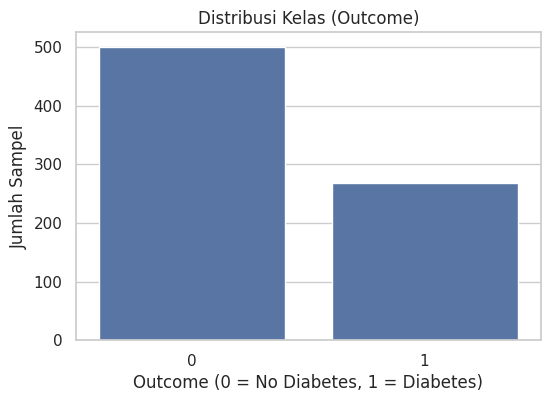

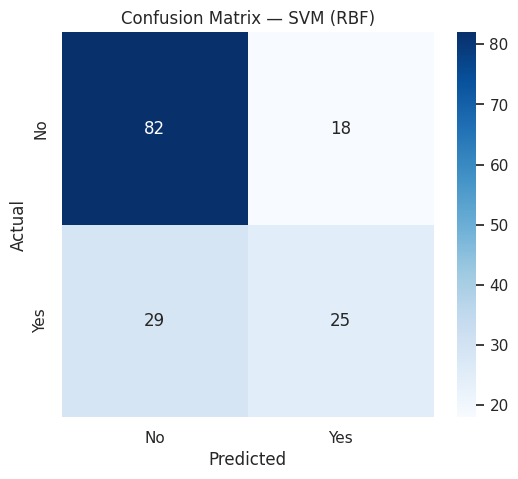

In [36]:
# 10a. Distribusi kelas
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Distribusi Kelas (Outcome)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah Sampel')
plt.show()

# 10b. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix — SVM (RBF)')
plt.show()


11. Penjelasan Singkat

*  Preprocessing: Ganti nilai 0 pada fitur yang seharusnya >0 menjadi NaN lalu imputasi median — alasan: di dataset Pima, 0 merepresentasikan data hilang.

*  Scaling menggunakan StandardScaler karena SVM sensitif terhadap skala fitur.

*  Split: train_test_split 80:20 dengan stratify agar sebaran kelas tetap.

*  Model: SVM dengan kernel RBF.
Alasan: dataset kemungkinan punya batas keputusan non-linear; RBF umum dipakai dan fleksibel.
Dilakukan GridSearch pada C dan gamma untuk mendapatkan kombinasi terbaik.

* Evaluasi: Accuracy, Precision, Recall, F1 score ditampilkan. Training vs test accuracy dibandingkan singkat untuk cek over/underfitting.

* Visualisasi: Distribusi kelas + Confusion Matrix (ditambah boxplot Glucose untuk insight fitur).